# Introduction to Reinforcement Learning

> This chapter is inspired by the book [Hands-On Machine Learning](https://github.com/ageron/handson-ml2) written by Aurélien Géron.

## Learning objectives

- Understand what Reinforcement Learning (RL) is about.
- Review Markow Decision Processes.
- Discover some of the main approaches to RL.

## Environnement setup

In [13]:
# Relax some linting rules not needed here
# pylint: disable=invalid-name,wrong-import-position,redefined-outer-name

import platform
from IPython.display import YouTubeVideo

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Python version: {platform.python_version()}")
print(f"NumPy version: {np.__version__}")

Python version: 3.11.1
NumPy version: 1.26.3


In [2]:
# Setup plots

# Include matplotlib graphs into the notebook, next to the code
# https://stackoverflow.com/a/43028034/2380880
%matplotlib inline

# Improve plot quality
%config InlineBackend.figure_format = "retina"

# Setup seaborn default theme
# http://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
sns.set_theme()

## What is Reinforcement Learning?

### RL in a nutshell

Reinforcement Learning is about **learning how to act in a dynamic system**.

The learner (often called an *agent*) is not told explicitly which **actions** to take, but instead must discover which actions yield the most **reward** over time by trying them.

Actions may affect not only the immediate reward but also the next situation and, through that, all subsequent rewards.

![Learning to ride a bike!](_images/prosper_bike.gif)

### A specific subfield of ML

RL is different from **supervised learning**, where correct answers (desired behaviour) are given to the learner during training. A RL learner must be able to learn from its own experience.

RL is also different from **unsupervised learning**: finding structure in unlabeled data could help, but does not solve the reward maximisation problem which is at the heart of RL.

Lastly, RL is different from **evolutionary methods**, which only consider the final outcome and ignore the intermediate steps RL is concerned with.

### Reinforcement Learning examples

RL can be applied to a wide variety of contexts. To name a few:

- controlling a robot;
- manage a financial portfolio;
- steering a ship;
- playing a game.

### Recent breakthroughs

RL is not a new field but went mainstream in recent years, mostly due to game-related feats:

- [AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far) beat Go champion Lee Sedol in 2016;
- [AlphaZero](https://deepmind.com/blog/article/alphazero-shedding-new-light-grand-games-chess-shogi-and-go) achieved superhuman level at chess, shogi and go in less than 24 hours in 2017;
- [OpenAI Five](https://openai.com/blog/openai-five/) demonstrated expert level play against other competitive Dota 2 teams in 2019;
- [AlphaStar](https://deepmind.com/blog/article/alphastar-mastering-real-time-strategy-game-starcraft-ii) reached StarCraft 2 Grandmaster level (top 0.2% of human players) also in 2019.

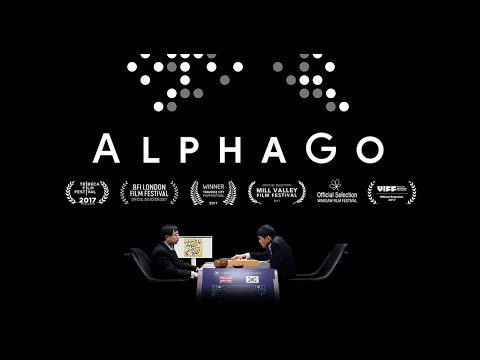

In [3]:
YouTubeVideo("WXuK6gekU1Y")

## Terminology

### The exploration vs. exploitation dilemna

The learner has to exploit what it has already experienced, but it also has to explore in order to discover better actions. Neither exploration nor exploitation can be pursued exclusively without failing at the task at hand.

![Exploration VS exploitation](_images/exploration_exploitation.png)

### General abstraction

- $s_t$: observed state of the dynamic system at step $t$.
- $a_t$: action taken by the agent at step $t$ in order to (try to) control the system.
- $r_t$: reward received by the agent at step $t$ (result of $a_{t-1}$).

![](_images/rl_schema.png)

### Policy

The algorithm used by the learner to determine its actions is called its **policy**. Policies may be *deterministic* or *stochastic* (involving some randomness).

Formally, a policy $\pi$ is a mapping from states to probabilities of selecting each possible action.

$\pi(a|s)$: probability that the agent will choose the action $a$ when in state $s$.

### Reward

A **reward signal** defines the goal in a RL problem. The learner’s sole objective is to maximize the total reward it receives in the long run. Rewards are its only guidance it gets.

$R_t=r(s,a,s')$: reward received at step $t$ when system goes from state $s$ to state $s'$, given a chosen action $a$.

### Return

It is common to evaluate actions based on the sum of all the rewards that came after them, usually applying a *discount factor* $\gamma \in [0,1]$.

$G_t$: sum of discounted rewards, called **return**.

$$G_t = R_{t+1} + \gamma R_{t+2} +\gamma^2 R_{t+3} + · · · = \sum\limits_{k=0}^\infty \gamma^k R_{t+k+1} = R_{t+1} + \gamma G_{t+1}$$

Usually $0.9<\gamma<0.99$.

### Markov Decision Processes

**Markov Decision Processes** (MDP) provide a mathematical framework for modeling decision making in discrete-time situations where outcomes are partly under the control of a decision maker. They were first described in the 1950s by Richard Bellman as an extension of (Andrey) **Markov chains**.

The dynamics of a MDP is defined as the transition probability $p(s',r | s,a)$ of getting state $s'$ and reward $r$ after having selected action $a$ in state $s$.

Many RL problems with discrete actions can be modeled as Markov Decision Processes.

![](_images/mdp_example.png)

In [4]:
transition_probabilities = [  # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None],
]
rewards = [  # shape=[s, a, s']
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
]
possible_actions = [[0, 1, 2], [0, 2], [1]]

### Value function

Whereas the reward signal indicates what is good in an immediate sense, a **value function** specifies what is good in the long run.

Action choices should be made based on value judgments, seeking actions that bring about states of highest value, not highest reward.

Unfortunately, rewards are basically given directly by the environment, whereas values must be **estimated** and re-estimated from the sequences of observations an agent makes over its entire lifetime.

### State value function

$G^\pi(s)$: long-term gain obtained by applying the actions from policy $\pi$, starting in state $s$.

$$G^\pi(s) = \sum\limits_{k = 0}^\infty \gamma^k R_{t+k+1}$$

$V^\pi(s)$: averaged sum of the returns $G^\pi(s)$ that the agent will get by starting from state $s$ and following $\pi$ thereafter.

$$V^\pi(s) = \mathbb{E} \left[ G^\pi(s) \right] = \mathbb{E}\left( \sum\limits_{t = 0}^\infty \gamma^t R_t \bigg| S_0 = s, \pi \right) = \sum\limits_{a} \pi(a|s) \sum\limits_{s', r}p(s',r | s,a)\left[r + \gamma V^{\pi}(s')\right]$$

### Action-state value function

$Q^\pi(s,a)$ (also called **Q-Value**): expected return starting from state $s$, taking the action $a$, and thereafter following policy $\pi$.

$$Q^\pi(s,a) = \mathbb{E}\left( \sum\limits_{t=0}^\infty \gamma^t R_t \bigg| S_0 = s, A_0=a, \pi \right)$$

$$Q^\pi(s,a) = \sum\limits_{s', r} p(s',r | s,a) \left[r + \gamma V^{\pi}(s')\right]$$

### Optimality

The optimal policy $\pi^*$ is the one that achieves the biggest reward over the long run.

$$V^{\pi^*}(s) = V^*(s) = \underset{a}{max} \sum\limits_{s', r}p(s',r | s,a)\left[r + \gamma V^*(s')\right]= \underset{a}{max}\;Q^*(s,a)$$

$$Q^{\pi^*}(s,a) = Q^*(s,a) = \sum\limits_{s',r} p(s',r | s,a) \left[r + \gamma \cdot \underset{a'}{max} \;Q^*(s',a')\right]$$

When the agent is in state $s$, it should choose the action with the highest Q-value for that state.

$$\pi^*(s) = \underset{a}{argmax} \;Q^*(s,a)$$

## Tabular methods

### Context

When the number of states and actions is limited, approximate value functions can be represented as arrays (*tables*) and stored in memory.

In this case, basic algorithms can often find exact solutions, i.e. the optimal value function and the optimal policy.

These **tabular methods** implement the core ideas of RL and form the building blocks of more powerful ones, used when the state and action spaces are too large.

### Value Iteration

Method for finding the optimal state value for each state.
- init all state value estimates to zero;
- iteratively update them using the following equation:

$$V_{k+1}(s) \leftarrow \underset{a}{max} \sum\limits_{s', r}p(s',r | s,a)\left[r + \gamma V_k(s')\right] = \underset{a}{max}\; Q_k(s,a)$$

Given enough iterations, these estimates will converge to the optimal state values.

### Q-Value Iteration

Like the Value iteration algorithm, iteratively compute $Q_{k+1}(s,a)$ for all $(s,a)$ until convergence.

$$Q_{k+1}(s,a) \leftarrow \sum\limits_{s',r} p(s',r | s,a) \left[r + \gamma \cdot \underset{a'}{max} \;Q_k(s',a')\right]$$

In [5]:
def init_q_values():
    """Init action-state values to 0 for all possible actions in all states"""

    Q_values = np.full((3, 3), -np.inf)  # -np.inf for impossible actions
    for state, actions in enumerate(possible_actions):
        Q_values[state, actions] = 0.0  # for all possible actions
    return Q_values


init_q_values()

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

In [6]:
Q_values = init_q_values()

gamma = 0.9  # Discount factor - try changing it to 0.95
n_iterations_q_value = 50
n_states = len(possible_actions)

history_q_value = []  # Store training history for plotting (later)
for iteration in range(n_iterations_q_value):
    Q_prev = Q_values.copy()
    history_q_value.append(Q_prev)
    # Compute Q_k+1 for all states and actions
    for s in range(n_states):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum(
                [
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                    for sp in range(n_states)
                ]
            )

history_q_value = np.array(history_q_value)

In [7]:
# Show final action-state values
print(Q_values)

[[18.91891892 17.02702702 13.62162162]
 [ 0.                -inf -4.87971488]
 [       -inf 50.13365013        -inf]]


In [8]:
def print_optimal_actions(q_values):
    """Print actions with maximum Q-value for each state"""

    # Find action with maximum Q-value for each state
    optimal_actions = np.argmax(q_values, axis=1)

    for s in range(n_states):
        print(f"Optimal action for state {s} is a{optimal_actions[s]}")


print_optimal_actions(Q_values)

Optimal action for state 0 is a0
Optimal action for state 1 is a0
Optimal action for state 2 is a1


### TD Learning

When the transition probabilities and rewards are not known in advance, the agent has to experience each state and each transition: once to know the rewards, several times to estimate the probabilities. It must use an **exploration policy** (for example, a purely random one) to traverse the MDP.

As it progresses, the **Temporal Difference (TD) Learning** algorithm updates the estimates of the state values based on the transition and rewards that are actually observed.

$$V_{k+1}(s) \leftarrow V_k(s) + \alpha\left(r + \gamma V_k(s') - V_k(s)\right) = V_k(s) + \alpha\cdot\delta_k(s, a, s')$$

$$V_{k+1}(s) \leftarrow (1-\alpha)V_k(s) + \alpha\left(r + \gamma V_k(s')\right)$$

$$V(s) \underset{\alpha}\leftarrow r + \gamma V(s')$$

- $\alpha$: learning rate, usually small (example: $0.001$).
- $\delta_k(s, a, s') = r + \gamma V_k(s') - V_k(s)$: TD error.

### Q-Learning

Adapted from the Q-Value Iteration algorithm for situations in which transitions and rewards are initially unknown, **Q-Learning** watches the agent play and gradually improves its estimations of the Q-values. Once it has accurate Q-Value estimates (or close enough), then the optimal policy is choosing the action that has the highest Q-Value (i.e. the *greedy* policy).

$$Q(s) \underset{\alpha}\leftarrow r + \gamma \cdot \underset{a}{max} \;Q(s',a')$$

In [9]:
def step(state, action):
    """Perform an action and receive next state and reward"""

    probas = transition_probabilities[state][action]
    next_state = np.random.choice(range(n_states), p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward


def exploration_policy(state):
    """Explore the MDP, returning a random action"""

    # This basic exploration policy is sufficient for this simple problem
    return np.random.choice(possible_actions[state])

In [10]:
Q_values = init_q_values()

alpha0 = 0.05  # initial learning rate
decay = 0.005  # learning rate decay
gamma = 0.9  # discount factor
n_iterations_q_learning = 10000
state = 0  # initial state
history_q_learning = []  # Training history

for iteration in range(n_iterations_q_learning):
    history_q_learning.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_q_value = np.max(Q_values[next_state])  # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)  # learning rate decay
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_q_value)
    state = next_state

history_q_learning = np.array(history_q_learning)

In [11]:
# Show final action-state values
print(Q_values)

print_optimal_actions(Q_values)

[[ 18.8808678   16.39390592  13.33234944]
 [  0.                 -inf -10.03099901]
 [        -inf  48.51477561         -inf]]
Optimal action for state 0 is a0
Optimal action for state 1 is a0
Optimal action for state 2 is a1


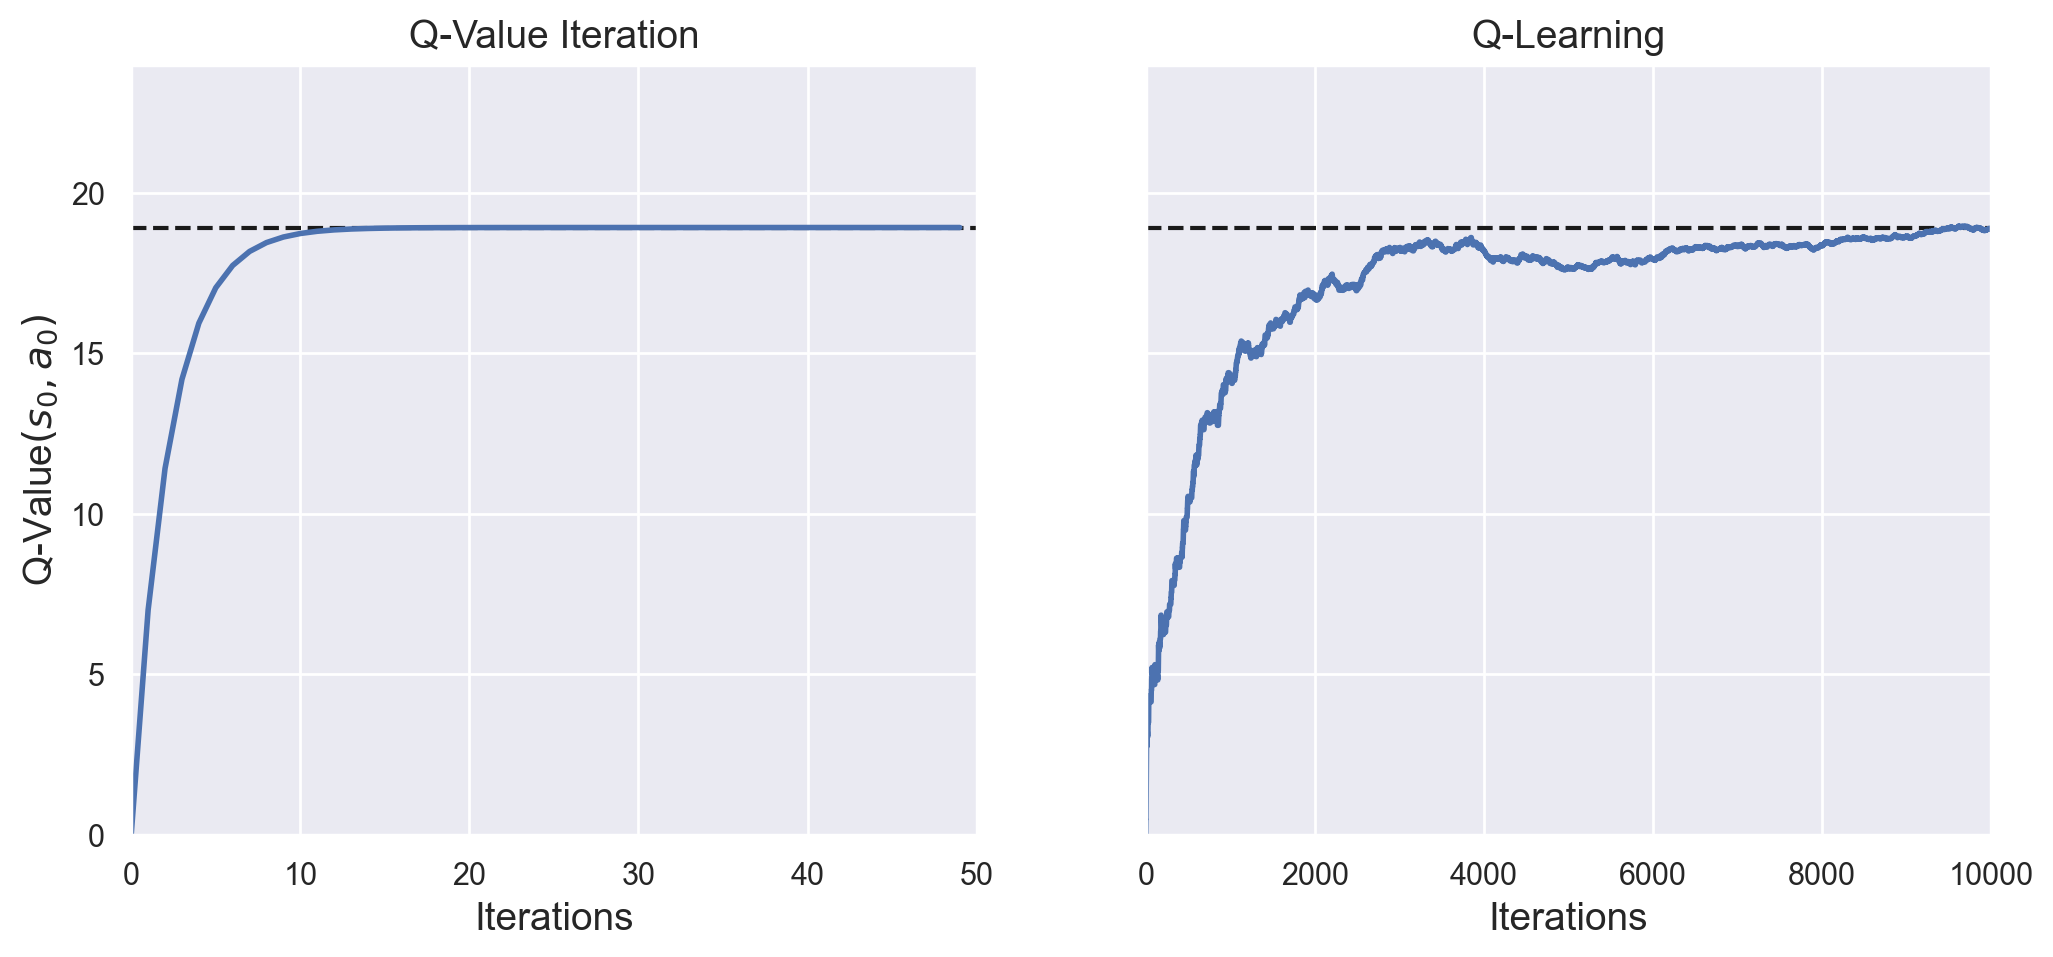

In [12]:
final_Q_value = history_q_value[-1, 0, 0]  # final q-value for s0 and a0

# Plot training history for Q-Value Iteration and Q-Learning methods
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(
    axes,
    (n_iterations_q_value, n_iterations_q_learning),
    (history_q_value, history_q_learning),
):
    ax.plot([0, width], [final_Q_value, final_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

## Approximate methods

## Context

The previous methods become intractable for problems with arbitrarily large state spaces. In such cases, it is hopeless to find an optimal policy or the optimal value function, even in the limit of infinite time and data. The goal instead is to discover a good approximate solution, using functions with a manageable number of parameters.

When dealing with large state spaces, **generalization** (the ability to make sensible decisions based on previous similar encounters) becomes a key issue. Generalization from examples is what **supervised learning** is all about, and many supervized methods have been applied to supplement RL algorithms.

For years, linear combinations of handcrafted features were necessary to estimate value functions through supervised models. Recently, reseachers have started to harness the power of **Deep Learning** for this task, eliminating the need for manual feature engineering.

### Policy gradients

Instead of trying to evaluate actions, **Policy Gradients (PG)** methods learn a parameterized policy that can select actions without consulting a value function. Policy parameters are optimized by following the *gradients* towards higher rewards.

One popular class of PG algorithms, called REINFORCE algorithms, was [introduced](https://homl.info/132) back in 1992.

### DQN

**Deep Q-Network (DQN)** was the first RL algorithm to feature a DL model. Introduced in 2014, it was used to learn to play old-school Atari games like Breakout.

DQN runs a deep neural network for approximating Q-Values. The network takes a state s (i.e. the last 4 screenshots of the game) as input, and outputs an estimation of the Q-Values of all actions in that state.

![](_images/dqn.png)

### Actor-Critic methods

This family of algorithms combines Policy Gradients with Deep Q-Networks. An Actor-Critic agent contains two neural networks: a policy net and a DQN.

- the DQN (critic) is trained normally, learning from the agent’s experiences;
- the policy net (actor) relies on the action values estimated by the DQN, a bit like an athlete learning with the help of a coach. After each action selection, the critic evaluates the new state to determine whether things have gone better or worse than expected.

### A3C

Introduced by DeepMind researchers in 2016, **Asynchronous Advantage Actor-Critic (A3C)** is an Actor-Critic variant where multiple agents learn in parallel, exploring different copies of the environment. At regular intervals, but asynchronously (hence the name), each agent pushes some weight updates to a master network, then it pulls the latest weights from that network. Each agent thus contributes to improving the master network and benefits from what the other agents have learned.

![](_images/A3C.png)


### PPO

**Proximal Policy Optimization (PPO)** is an algorithm based on Advantage Actor-Critic (A2C). In a nutshell, it makes RL less sensitive to step size without the tradeoffs incurred by other approaches.

In 2019, OpenAI Five, based on the PPO algorithm, defeated the world champions at the multiplayer game Dota 2.